In [1]:
from tensorflow.keras.preprocessing import image
from PIL import Image
import random
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import matplotlib.pyplot as plt

# Creating a data set

In [2]:
def DataSet():
    #Define paths for training sets
    train_path_yawn = 'W:/Case study dataset/train/yawn/'
    train_path_no_yawn = 'W:/Case study dataset/train/no_yawn/'
    # List the file name of the image in the path
    imglist_train_yawn = os. listdir(train_path_yawn)
    imglist_train_no_yawn = os.listdir(train_path_no_yawn)
    # Define numpy objects to convert images to numoy vector form
    X_train = np.empty((len(imglist_train_yawn) + len(imglist_train_no_yawn), 224, 224, 3))
    Y_train = np.empty((len(imglist_train_yawn) + len(imglist_train_no_yawn), 2))
    #Record the number of pictures
    count = 0
    for img_name in imglist_train_yawn:
        #Get the path of the image
        img_path = train_path_yawn + img_name
        # The image.load_img() function reads the corresponding image and converts it to the target size
        img = image.load_img(img_path, target_size=(224, 224))
        # Turn the image into a numpy array and divide by 255 to normalize, so the shape of img is (224,224,3)
        img = image.img_to_array(img) / 255.0
        # # Load the processed image into the X_train object
        X_train[count] = img
        ## Load the processed images into the defined Y_train object, which is 1,0 since they are all yawn images
        Y_train[count] = np.array((1,0))
        count+=1
    # Go through the pictures without yawning
    for img_name in imglist_train_no_yawn:
        img_path = train_path_no_yawn + img_name
        # The image.load_img() function reads the corresponding image and converts it to the target size
        img = image.load_img(img_path, target_size=(224, 224))
        # Turn the image into a numpy array and divide by 255 to normalize, so the shape of img is (224,224,3)
        img = image.img_to_array(img) / 255.0
        # # Load the processed image into the X_train object
        X_train[count] = img
        # Load the processed images into the defined Y_train object, which is 1,0 since they are all yawn images
        Y_train[count] = np.array((0,1))
        count+=1
    # Shuffle the data in the train set   
    index = [i for i in range(len(X_train))]
    random.shuffle(index)
    X_train = X_train[index]
    Y_train = Y_train[index]
    #return two train dataset
    return X_train,Y_train 
X_train,Y_train = DataSet()
#No test set is required, and each validation splits the data from the training set to the test set
np.save('W:/Case study dataset/test3/X_train', X_train, allow_pickle=True, fix_imports=True)
np.save('W:/Case study dataset/test3/Y_train', Y_train, allow_pickle=True, fix_imports=True)
print('X_train shape : ',X_train.shape)
print('Y_train shape : ',Y_train.shape)


X_train shape :  (1448, 224, 224, 3)
Y_train shape :  (1448, 2)


# Training model

In [3]:
import scipy
from scipy import ndimage
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

In [4]:
X_train = np.load('W:/Case study dataset/test3/X_train.npy')
Y_train = np.load('W:/Case study dataset/test3/Y_train.npy')
model = ResNet50(weights=None,classes=2)
model.compile(optimizer=Adam(learning_rate =0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#model save path
filepath='W:/Case study dataset/model/myresnet50model_2classes_times=1_e20bs10_etimes={epoch:02d}_valacc={val_accuracy:.2f}.h5'
#Save it after every round of training
checkpoint = ModelCheckpoint(filepath, verbose=1,save_best_only=False,save_weights_only=False)
callbacks_list = [checkpoint]
#training
history=model.fit(X_train, Y_train, epochs=20, batch_size=10,validation_split=0.25,callbacks=callbacks_list)

Epoch 1/20
109/109 [==============================] - ETA: 0s - loss: 0.9563 - accuracy: 0.5902
Epoch 1: saving model to W:/Case study dataset/model\myresnet50model_2classes_times=1_e20bs10_etimes=01_valacc=0.49.h5
109/109 [==============================] - 397s 4s/step - loss: 0.9563 - accuracy: 0.5902 - val_loss: 1.4504 - val_accuracy: 0.4945
Epoch 2/20
109/109 [==============================] - ETA: 0s - loss: 0.6168 - accuracy: 0.6529
Epoch 2: saving model to W:/Case study dataset/model\myresnet50model_2classes_times=1_e20bs10_etimes=02_valacc=0.51.h5
109/109 [==============================] - 359s 3s/step - loss: 0.6168 - accuracy: 0.6529 - val_loss: 1.2927 - val_accuracy: 0.5055
Epoch 3/20
109/109 [==============================] - ETA: 0s - loss: 0.5853 - accuracy: 0.7155
Epoch 3: saving model to W:/Case study dataset/model\myresnet50model_2classes_times=1_e20bs10_etimes=03_valacc=0.55.h5
109/109 [==============================] - 355s 3s/step - loss: 0.5853 - accuracy: 0.7155 -

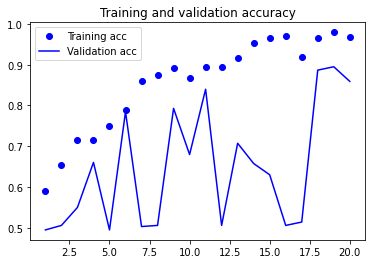

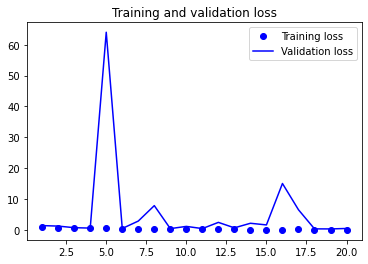

In [5]:
# draw
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()